# Titanic Survival Prediction

## 1. Import Libraries and Load Data

First, let's import the necessary libraries and load our training and testing datasets.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


train_df = pd.read_csv('../train.csv')
test_df = pd.read_csv('../test.csv')

train_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Exploratory Data Analysis (EDA)

Now, let's explore the data to understand its structure, find patterns, and identify missing values.

Train dataset shape: (891, 12)
Test dataset shape: (418, 11)

Colonnes disponibles : ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

=== Informations sur le jeu d'entraînement ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.

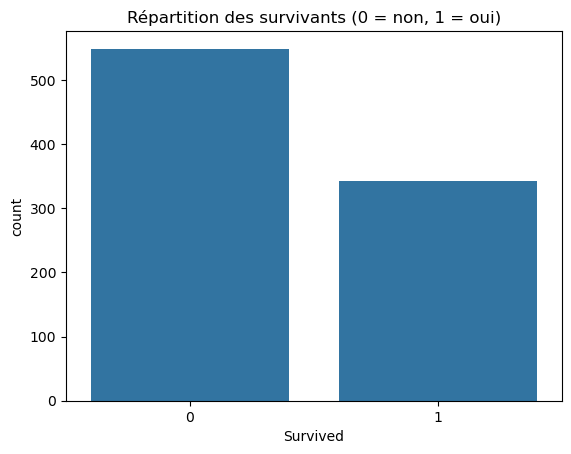

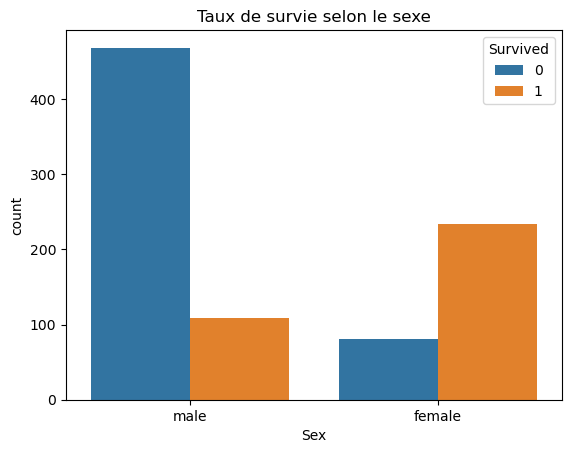

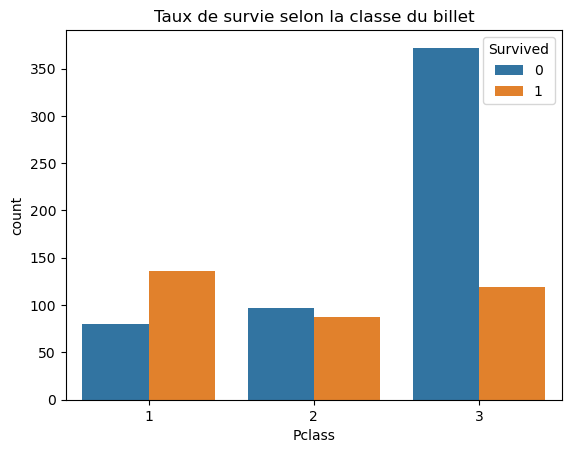

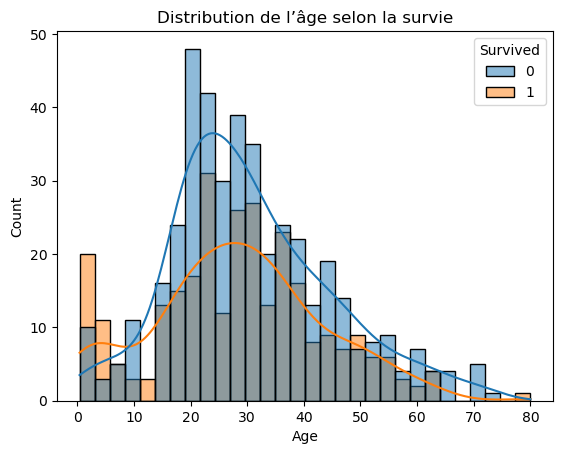

In [9]:
# Your EDA code here. 
# Examples: 
# - train_df.info()
# - train_df.describe()
# - sns.countplot(x='Survived', data=train_df)
# - sns.catplot(x='Sex', col='Survived', kind='count', data=train_df)

print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)
print("\nColonnes disponibles :", list(train_df.columns))

print("\n=== Informations sur le jeu d'entraînement ===")
train_df.info()

print("\n=== Statistiques descriptives ===")
print(train_df.describe())

print("\n=== Valeurs manquantes ===")
print(train_df.isnull().sum())

sns.countplot(x='Survived', data=train_df)
plt.title('Répartition des survivants (0 = non, 1 = oui)')
plt.show()

sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Taux de survie selon le sexe')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Taux de survie selon la classe du billet')
plt.show()

sns.histplot(data=train_df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Distribution de l’âge selon la survie')
plt.show()


## 3. Data Cleaning & Feature Engineering

Based on our EDA, we'll clean the data by handling missing values and create new features to improve our model's performance.

In [10]:
# Your data cleaning and feature engineering code here.
# Examples:
# - Handle missing 'Age' values
# - Convert 'Sex' to numerical values
# - Create a 'FamilySize' feature

train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1}).astype(int)
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1}).astype(int)

train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

train_df['IsAlone'] = 0
train_df.loc[train_df['FamilySize'] == 1, 'IsAlone'] = 1
test_df['IsAlone'] = 0
test_df.loc[test_df['FamilySize'] == 1, 'IsAlone'] = 1

features_drop = ['Name', 'Ticket', 'Cabin']
train_df.drop(features_drop, axis=1, inplace=True)
test_df.drop(features_drop, axis=1, inplace=True)

train_df.head()


C:\Users\Jadev\AppData\Local\Temp\ipykernel_92864\2215271201.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\Jadev\AppData\Local\Temp\ipykernel_92864\2215271201.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,0,22.0,1,0,7.2500,0,2,0
1,2,1,1,1,38.0,1,0,71.2833,1,2,0
2,3,1,3,1,26.0,0,0,7.9250,0,1,1
3,4,1,1,1,35.0,1,0,53.1000,0,2,0
4,5,0,3,0,35.0,0,0,8.0500,0,1,1


## 4. Model Training and Evaluation

It's time to choose a model, train it on our processed data, and see how well it performs.

In [ ]:
# Your model training code here.
# Examples:
# - from sklearn.model_selection import train_test_split
# - from sklearn.linear_model import LogisticRegression
# - Define features (X) and target (y)
# - Split data, train model, check accuracy

## 5. Create Submission File

Finally, we'll use our trained model to make predictions on the test set and generate the submission file in the required format.

In [ ]:
# Your submission generation code here.
# - Process the test_df in the same way as train_df
# - model.predict(X_test)
# - Create a submission DataFrame and save to 'submission.csv'


In [5]:
import os
print(os.getcwd())


c:\Users\Jadev\OneDrive\Documents\Hackaton\Hackaton_ML_Les_Petits_Herisson
